<a href="https://colab.research.google.com/github/NaufalPratomo/PCVK_Ganjil_2025/blob/main/Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

**mengimpor library**

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

**Tugas 3: Membuat Histogram Citra Secara Manual**

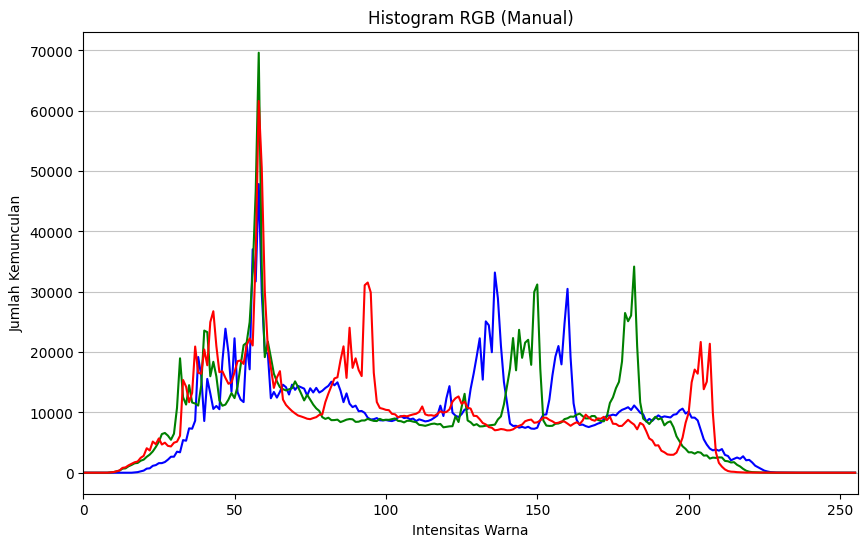

In [15]:
path_gambar = 'gambar1.tiff'
img = cv2.imread(path_gambar)

if img is None:
    print(" ERROR: Gambar tidak ditemukan. Pastikan path sudah benar.")
else:
    # Pisahkan channel warna B, G, R
    colors = ('b', 'g', 'r')

    plt.figure(figsize=(10, 6))
    plt.title("Histogram RGB (Manual)")
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah Kemunculan")

    for i, color in enumerate(colors):
        # Buat array kosong (berisi nol) berukuran 256 untuk menyimpan hitungan piksel
        hist = np.zeros(256)

        # Ambil channel warna yang sesuai
        channel = img[:,:,i]

        # Hitung kemunculan setiap intensitas piksel
        for y in range(channel.shape[0]):
            for x in range(channel.shape[1]):
                intensitas = channel[y, x]
                hist[intensitas] += 1

        # Plot histogram untuk channel ini
        plt.plot(hist, color=color)

    plt.xlim([0, 256])
    plt.grid(axis='y', alpha=0.75)
    plt.show()

**Tugas 4: Membuat Histogram dengan Library NumPy**

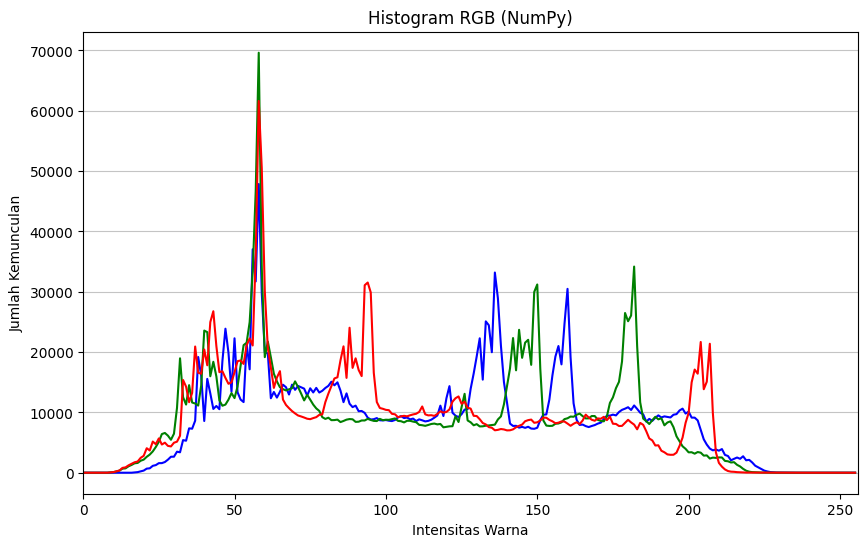

In [16]:
if img is not None:
    colors = ('b', 'g', 'r')

    plt.figure(figsize=(10, 6))
    plt.title("Histogram RGB (NumPy)")
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah Kemunculan")

    for i, color in enumerate(colors):
        # Gunakan np.histogram untuk menghitung frekuensi piksel
        # np.ravel() mengubah array 2D menjadi 1D agar mudah dihitung
        hist, bins = np.histogram(img[:,:,i].ravel(), 256, [0, 256])

        # Plot histogram
        plt.plot(hist, color=color)

    plt.xlim([0, 256])
    plt.grid(axis='y', alpha=0.75)
    plt.show()

**Tugas 5: Histogram Equalization Secara Manual**

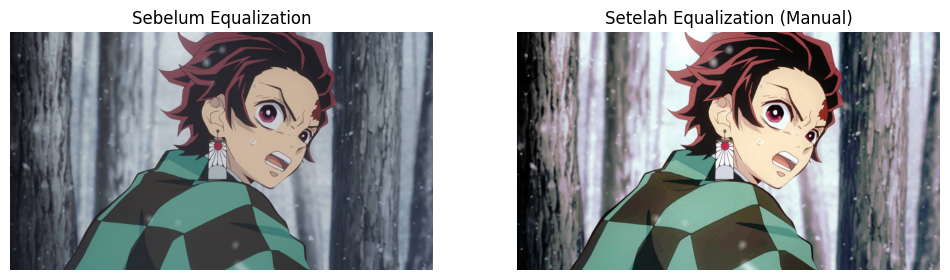

In [17]:
path_gambar_lc = 'gambar1.tiff'
img_lc = cv2.imread(path_gambar_lc)

if img_lc is None:
    print("ERROR: Gambar 'lena_lc.jpg' tidak ditemukan.")
else:
    # 1. Buat array kosong seukuran gambar asli untuk menampung hasil
    img_equalized = np.zeros_like(img_lc)

    for i in range(3): # Loop untuk setiap channel B, G, R
        channel = img_lc[:,:,i]

        # 2. Hitung histogram
        hist, bins = np.histogram(channel.ravel(), 256, [0, 256])

        # 3. Hitung Cumulative Distribution Function (CDF)
        cdf = hist.cumsum()

        # 4. Normalisasi CDF sesuai rumus K_o [cite: 57]
        # (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
        cdf_normalized = np.ma.masked_equal(cdf, 0)
        cdf_normalized = (cdf_normalized - cdf_normalized.min()) * 255 / (cdf_normalized.max() - cdf_normalized.min())
        cdf_final = np.ma.filled(cdf_normalized, 0).astype('uint8')

        # 5. Terapkan nilai baru ke citra
        img_equalized[:,:,i] = cdf_final[channel]

    # Tampilkan gambar sebelum dan sesudah
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img_lc, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Sebelum Equalization')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(img_equalized, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Setelah Equalization (Manual)')
    axes[1].axis('off')

    plt.show()

**Tugas 6: Histogram Equalization dengan Library CV2**

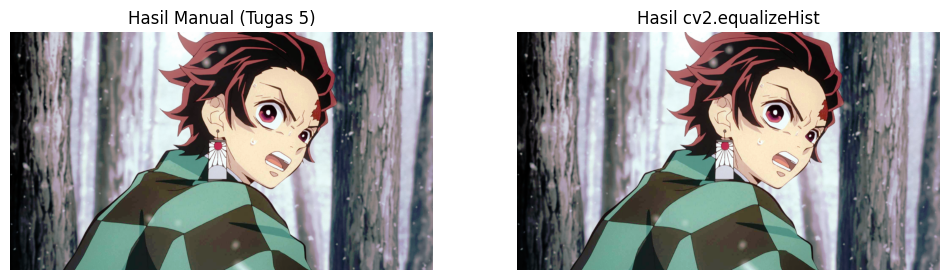

In [18]:
if img_lc is not None:
    # Pisahkan channel B, G, R
    b, g, r = cv2.split(img_lc)

    # Terapkan equalizeHist pada setiap channel
    b_equalized = cv2.equalizeHist(b)
    g_equalized = cv2.equalizeHist(g)
    r_equalized = cv2.equalizeHist(r)

    # Gabungkan kembali channel yang sudah di-equalize
    img_equalized_cv2 = cv2.merge((b_equalized, g_equalized, r_equalized))

    # Tampilkan hasilnya untuk perbandingan
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img_equalized, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Hasil Manual (Tugas 5)')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(img_equalized_cv2, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Hasil cv2.equalizeHist')
    axes[1].axis('off')

    plt.show()

**Tugas 7: Pemetaan Warna ke 8 Warna Dasar (Kuantisasi)**

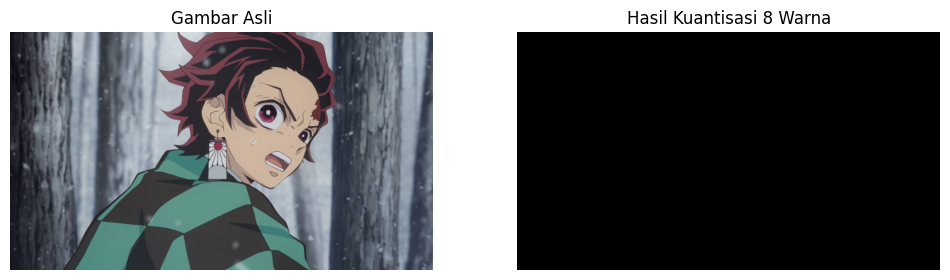

In [19]:
path_gambar_lena = 'gambar1.tiff'
img_lena = cv2.imread(path_gambar_lena)

if img_lena is None:
    print("ERROR: Gambar 'lena.jpg' tidak ditemukan.")
else:
    # Definisikan 8 warna target dalam format BGR
    palette_bgr = {
        "hitam":   (0, 0, 0),
        "putih":   (255, 255, 255),
        "merah":   (0, 0, 255),
        "hijau":   (0, 255, 0),
        "biru":    (255, 0, 0),
        "kuning":  (0, 255, 255),
        "cyan":    (255, 255, 0),
        "magenta": (255, 0, 255)
    }

    # Konversi dictionary ke array NumPy agar lebih cepat
    palette_array = np.array(list(palette_bgr.values()), dtype=np.uint8)

    # Buat gambar baru dengan melakukan reshape dan kalkulasi jarak
    # Ini adalah cara yang jauh lebih cepat daripada loop pixel-by-pixel
    pixels = img_lena.reshape((-1, 3))
    distances = np.linalg.norm(pixels[:, np.newaxis] - palette_array, axis=2)
    closest_colors = palette_array[np.argmin(distances, axis=1)]
    img_quantized = closest_colors.reshape(img_lena.shape).astype(np.uint8)

    # Tampilkan hasilnya
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Gambar Asli')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(img_quantized, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Hasil Kuantisasi 8 Warna')
    axes[1].axis('off')

    plt.show()

**Tugas 8 & 9: Dithering Floyd-Steinberg**

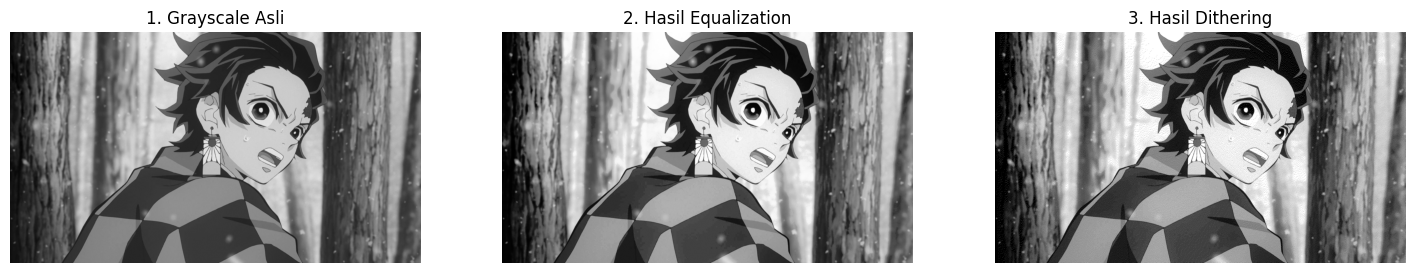

In [20]:
path_gambar_dither = 'gambar1.tiff'
img_dither_orig = cv2.imread(path_gambar_dither)

if img_dither_orig is None:
    print("ERROR: Gambar 'lena_lc.jpg' tidak ditemukan.")
else:
    # 1. Ubah ke grayscale
    gray_img = cv2.cvtColor(img_dither_orig, cv2.COLOR_BGR2GRAY)

    # 2. Lakukan Histogram Equalization
    equalized_img = cv2.equalizeHist(gray_img)

    # 3. Implementasi Dithering Floyd-Steinberg
    dithered_img = equalized_img.copy().astype(np.float32)
    h, w = dithered_img.shape

    for y in range(h):
        for x in range(w):
            old_pixel = dithered_img[y, x]
            # Kuantisasi sederhana ke hitam (0) atau putih (255)
            new_pixel = 255 if old_pixel > 127 else 0
            dithered_img[y, x] = new_pixel

            # Hitung error
            quant_error = old_pixel - new_pixel

            # Sebarkan error ke piksel tetangga sesuai kernel [cite: 145]
            if x + 1 < w:
                dithered_img[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < h:
                dithered_img[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < h:
                dithered_img[y + 1, x] += quant_error * 5 / 16
            if x + 1 < w and y + 1 < h:
                dithered_img[y + 1, x + 1] += quant_error * 1 / 16

    # Konversi kembali ke tipe uint8 untuk display
    dithered_img = dithered_img.astype(np.uint8)

    # Tampilkan semua tahapan
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(gray_img, cmap='gray')
    axes[0].set_title('1. Grayscale Asli')
    axes[0].axis('off')

    axes[1].imshow(equalized_img, cmap='gray')
    axes[1].set_title('2. Hasil Equalization')
    axes[1].axis('off')

    axes[2].imshow(dithered_img, cmap='gray')
    axes[2].set_title('3. Hasil Dithering')
    axes[2].axis('off')

    plt.show()